<a href="https://colab.research.google.com/github/sai-bharghav/Deep-Learning/blob/main/Custom_Data_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Custom Datasets

We've used some datasets with PyTorch before.

But how can we get our own data into PyTorch?


One of the ways to do is via:Custom datasets


## Domain Libraries

Depending on what you're working on, visiom, text, audio, recommendation, you'll want to look into each of the PyTorch domiain libraries for existing data loading functions and customizable data loading functions

## 0. Importing PyTorch and setting up device-agnostic code

In [ ]:
import torch
from torch import nn

# Note: PyTorch 1.10.0+
torch.__version__

'2.2.1+cu121'

In [ ]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get Data

First thing's first we need some data.

And like any good cooking show, some data has already been prepared for us.

We're going to start small.

Because we're not looking to train the biggest model or use the biggest dataset yet.

Machine learning is an iterative process, start small, get something working and increase when necessary.

The data we're going to be using is a subset of the [Food101 dataset.](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)

Food101 is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).

Can you think of 101 different foods?

Can you think of a computer program to classify 101 foods?

I can.

A machine learning model!

Specifically, a PyTorch computer vision model like we covered in notebook 03.

Instead of 101 food classes though, we're going to start with 3: pizza, steak and sushi.

And instead of 1,000 images per class, we're going to start with a random 10% (start small, increase when necessary).

When starting out ML projects, it's importtnat to try things on a small scale and then increase the scale when necessary

If you'd like to see where the data came from you see the following resources:

* Original [Food101 dataset and paper website](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).
* torchvision.datasets.Food101 - the version of the data I downloaded for this notebook.
* extras/04_custom_data_creation.ipynb - a notebook where Daniel formatted the Food101 dataset to use for this notebook.
* data/pizza_steak_sushi.zip - the zip archive of pizza, steak and sushi images from Food101, created with the notebook linked above.


Let's write some code to download the formatted data from GitHub
> **Note** - The dataset we're about to use has been pre-formatted for what we'd like to use it for. However, you'll often have to format your own datasets for whatever problem you're working on. This is a regular practice in the machine learning world.



In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup Path to a data folder
data_path = Path('data/')
image_path = data_path/"pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it....
if image_path.is_dir():
  print(f'{image_path} directory already exists.... skipping download')
else:
  print(f'{image_path} does not exist, creating one....')
  image_path.mkdir(parents=True, exist_ok=True)


# Downalod pizza, steak and sushi data
with open(data_path/'pizza_steak_sushi.zip','wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('Download pizza, steak and sushi images...')
  f.write(request.content)

# Unzip the data which is downloaded
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
  print('Unzipping pizza, steak and sushi data.....')
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one....
Download pizza, steak and sushi images...
Unzipping pizza, steak and sushi data.....


## Becoming one with the data ( data preparation and data exploration)


In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents"""
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in "data/pizza_steak_sushi"
There are 3 directories and 0 images in "data/pizza_steak_sushi/train"
There are 0 directories and 72 images in "data/pizza_steak_sushi/train/sushi"
There are 0 directories and 75 images in "data/pizza_steak_sushi/train/steak"
There are 0 directories and 78 images in "data/pizza_steak_sushi/train/pizza"
There are 3 directories and 0 images in "data/pizza_steak_sushi/test"
There are 0 directories and 31 images in "data/pizza_steak_sushi/test/sushi"
There are 0 directories and 19 images in "data/pizza_steak_sushi/test/steak"
There are 0 directories and 25 images in "data/pizza_steak_sushi/test/pizza"


It looks like we got 75 training images and 25 testing images per class

Let us assign a variable to the train path and test path


In [ ]:
# Setup training and testing paths

train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing the image


Let's write some code to:
1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we are working with images, let's open the image with PIL(Pillow)
5. We'll then show the image and print metadata

data/pizza_steak_sushi/train/steak/3857508.jpg
steak
Random image path :data/pizza_steak_sushi/train/steak/3857508.jpg
Image class :steak
Image height : 512
Image width : 512


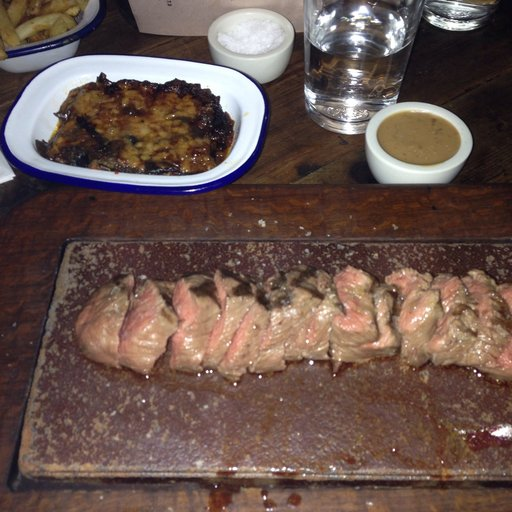

In [ ]:
import random
from PIL import Image


# Set seed
# random.seed(42)


#1. Get all the image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))# We will use the POsix path with glob() with a pattern

# image_path_list

#2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)

#4. Open image
img=Image.open(random_image_path)

#5. Print metadata
print(f'Random image path :{random_image_path}')
print(f'Image class :{image_class}')
print(f'Image height : {img.height}')
print(f'Image width : {img.width}')
img

###2.2 Visualizing the image with matplotlib


(-0.5, 511.5, 511.5, -0.5)

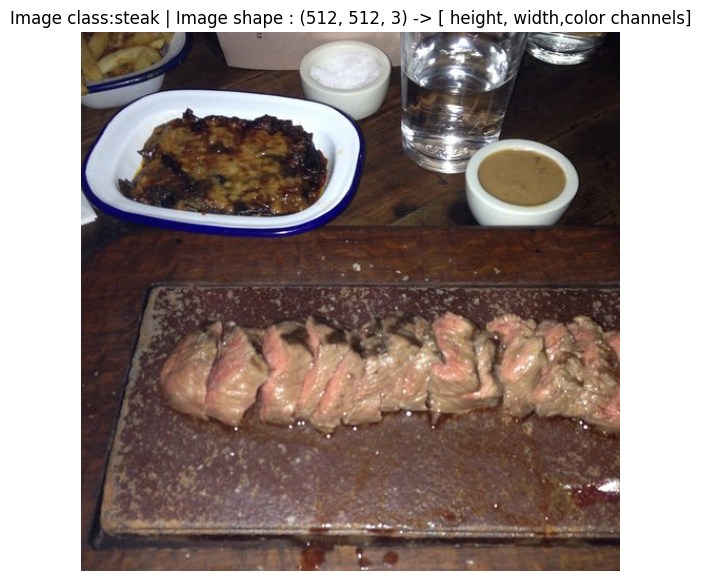

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the iamge into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f'Image class:{image_class} | Image shape : {img_as_array.shape} -> [ height, width,color channels]')
plt.axis(False)

## 3. Transforming data

Before we can use our image data with PyTorch:
1. Turn your data into tesnors(in our case, numerical representaion of our images)
2. Turn it into a `torch.utils.data.Dataset` and then subsequently a `torch.utils.data.DataLoader`, we'll call this as dataset or dataloader


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

###3.1 Transforming data with `torchvision.transforms`

Transforms help you get your images to be used with a model/perform data augmentation

In [ ]:
# Write a trasnform for image

data_transform= transforms.Compose([
    # Resize our image into 64*64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

In [ ]:
data_transform(img).dtype

torch.float32

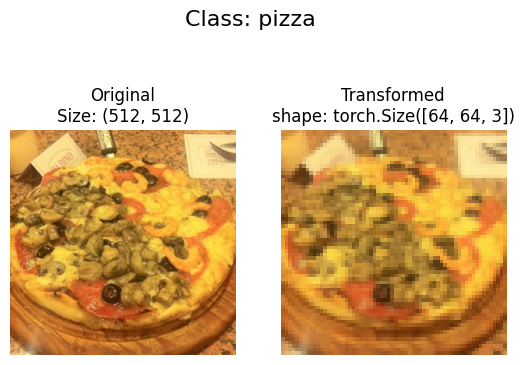

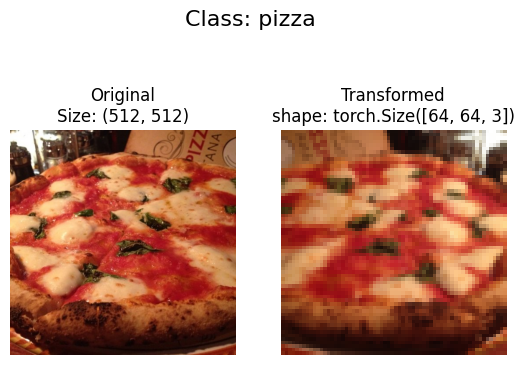

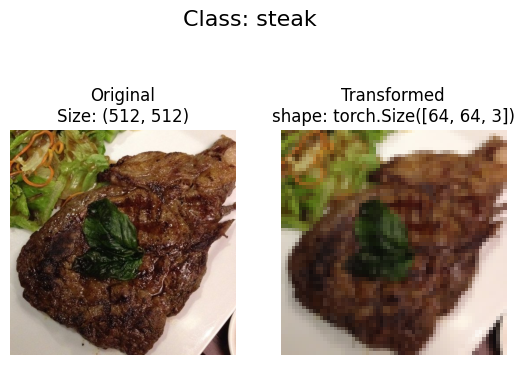

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Selects random images and loads/transforms them then plots the original vs the trasnformed version.
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Original\nSize: {f.size}')
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image=transform(f).permute(1,2,0)# CHW->HWC Since it is matplotliib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nshape: {transformed_image.shape}')
      ax[1].axis(False)

      fig.suptitle(f'Class: {image_path.parent.stem}',fontsize=16)

plot_transformed_images(image_paths = image_path_list,
                       transform = data_transform,
                        n=3,
                        seed=41)

## 4.Option 1: Loading image data using `ImageFolder`

We can image classification data using `torchvision.datasets.ImageFolder`

In [ ]:
# Use ImageFolder to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the length of our dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Index on the train_data dataset tp get a single image and label
img,label = train_data[0][0],train_data[0][1]
print(f'Image tensor: \n {img}')
print(f'Image shape: {img.shape}')
print(f'Image datatype : {img.dtype}')
print(f'Image label : {label}')
print(f'Label datatype : {type(label)}')

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original shape: torch.Size([3, 64, 64]) -> [color_channels,height, width]
Image permute : torch.Size([64, 64, 3]) ->[height, width, color_channels]


Text(0.5, 1.0, 'pizza')

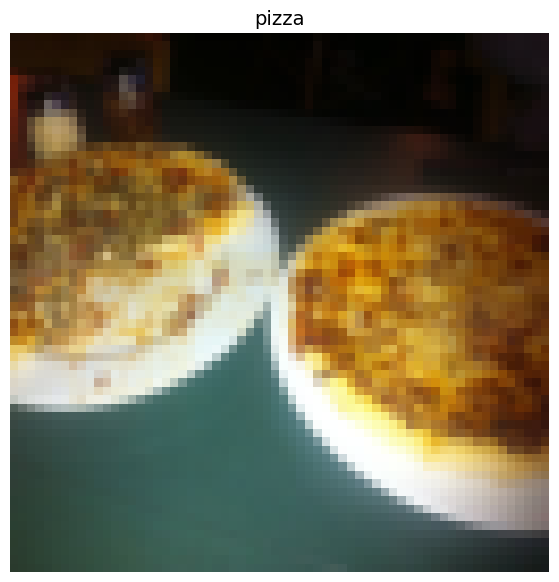

In [ ]:
# Rearrage the order of dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f'Original shape: {img.shape} -> [color_channels,height, width]')
print(f'Image permute : {img_permute.shape} ->[height, width, color_channels]')

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label],fontsize=14)

### 4.1 Turn loaded images into `DataLoaders`


A `DataLodaer` is gong to help us turn our `Dataset` into iterables and we can customize the `batch_size` so our model an see `batch_size` images at a time

In [ ]:
# Turn our train and test datasets into DataLoader's

from torch.utils.data import DataLoader
BATCH_SIZE= 32
train_dataloader = DataLoader(train_data,
                               batch_size =BATCH_SIZE,
                               num_workers=os.cpu_count(),shuffle=True)

test_dataloader = DataLoader(test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78967b9fb790>,
 <torch.utils.data.dataloader.DataLoader at 0x78967b9fba00>)

In [ ]:
print(f'Train dataloader length is : {len(train_dataloader)}')
print(f'Test dataloader length is :{len(test_dataloader)}')
print(f'Train data length is : {len(train_data)}')
print(f'Test data length is : {len(test_data)}')

Train dataloader length is : 8
Test dataloader length is :3
Train data length is : 225
Test data length is : 75


In [ ]:
img,label = next(iter(train_dataloader))

# batch size will now be 1, you can change the batch size if you lik e
print(f'Image shape : {img.shape} ->[batch_size,color_channels,height,width] ')
print(f'Label shape : {label.shape}')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Image shape : torch.Size([32, 3, 64, 64]) ->[batch_size,color_channels,height,width] 
Label shape : torch.Size([32])


## 5 Option 2: Loading image data with a custom `Dataset`


1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

To create a functionality like `ImageFolder` we need to subset the module `torch.utils.data.Dataset`

All subclasses should overwrite `__getitem()__` supporting fetching a data sample for a given key. Subclasses could also optionally overwrite `__len__()`, which is expected to return the size of the datasaet by many `Sampler` implementations and the default options of `DataLoader`

Pros:
* Can create a `Dataset` out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

Cons:
* Evn though you could create `Dataset` out of almost anything, it doesn't mean it will work....
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues

In [ ]:
import os
import pathlib
import torch
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvison.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Let us write some code to have this functionality on our custom dataset

### 5.1 Creatiing a helper function to get class names

We want a function to,
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format)
2. Raise an error if the class names aren't found (if this happens, there might be something wrong with the directory structure)
3. Turn the class names into a dict and a list and return them

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f'Target dir : {target_directory}')

# Get the class names form the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  """Finds the class folder names in a target directory """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise and error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't found any classes in {directory} ... please check file structure")

  # 3. Create a dictionary of index labels (comnputers prefer numbers rather then strings as labels)
  class_to_idx = {class_name: i for i,class_name in enumerate(classes)}
  return classes,class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our daa.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images(0`, this function will open an image
5. Overwrite the `__len__()` method to return the legth of the dataset
6. Overwrite the `__getitem__()` method to return a given sample passed an index



In [ ]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclas torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
    # Steup transforms
    self.transform = transform
    # Create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. Create a fucntion to load images
  def load_image(self,index:int) -> Image.Image:
    "Open an image via path and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite __len__()
  def __len__(self)->int:
    "Returns the total number of samples"
    return len(self.paths)

  # 6. Overwrite __getitem__()
  def __getitem__(self,index:int)-> Tuple[torch.Tensor,int]:
    "Returns one sample of data, data and label (X,y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # Expects path in format : dat_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img),class_idx # Return data,Label(X,y)
    else:
      return img, class_idx # Return untransformed image

This is one of the downsides of creating your own custom `Dataset`'s.

However, now we've written it once, we could move it into a `.py` file such as `data_loader.py` along with some other helpful data functions and reuse it later on.

Before we test out our new `ImageFolderCustom` class, let's create some transforms to prepare our images.

In [ ]:
# Create a transform
from torchvision import transforms
train_transforms = transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor()
    ]
)

test_transforms = transforms.Compose([
    transforms.Resize(size =(64,64)),
    transforms.ToTensor()
])


Let's turn our training images (contained in `train_dir`) and our testing images (contained in `test_dir`) into `Dataset`'s using our own `ImageFolderCustom` class.

In [ ]:
# Test our ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform = test_transforms)

In [ ]:
train_data_custom , test_data_custom

(<__main__.ImageFolderCustom at 0x78967b8836d0>,
 <__main__.ImageFolderCustom at 0x78967b883d60>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
len(test_data),len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality original ImageFOlder Dataset and ImageFolderCusomt Dataset
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a fucntion to display random images

1. Take in a  `Dataset` and a number of other parameters sucnh as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target deataset.
5. Setup a matplotlib plot
6. Loop through random sample images and plot them with matplotlib.
7. Make sure the dimension of our images line up with matplotlib (HWC)

In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes:List[str]=None,
                          n:int=10,
                          display_shape:bool=True,
                          seed:int = None):

  # 2 . Adjust display if n is too high
  if n>10:
    n=10
    display_shape=False
    print(f'For display purposes, n should not be larger than 10, setting to 10...')

  #3. Set the seed
  if seed:
    random.seed(seed)

  #4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)),k=n)

  # 5. Setup plot
  plt.figure(figsize=(16,8))


  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0],dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0) # [color_channels, height, weight] -> [height, weight, color_channels]

    # Plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis('off')
    if classes:
      title = f'Class: {classes[targ_label]}'
      if display_shape:
        title = title+ f'\nshape: {targ_image_adjust.shape}'
    plt.title(title)

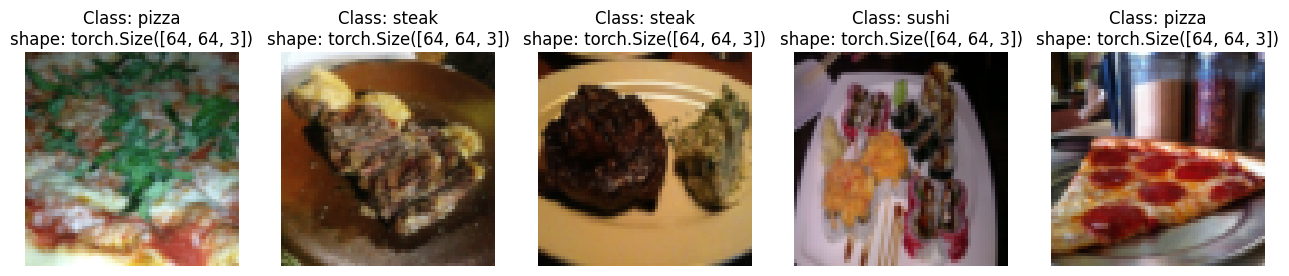

In [ ]:
# Dispaly random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes= class_names,
                      seed=None)

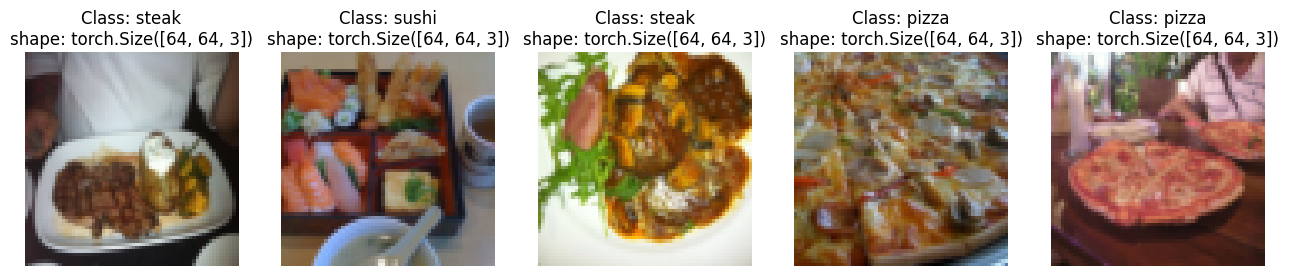

In [ ]:
# Display random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

### 5.4  Turn custom loaded images into `DataLoader's`
We've got a way to turn our raw images into `Dataset`'s (features mapped to labels or `X`'s mapped to `y`'s) through our `ImageFolderCustom` class.

Now how could we turn our custom `Dataset`'s into `DataLoader`'s?

If you guessed by using `torch.utils.data.DataLoader()`, you'd be right!

Because our custom `Dataset`'s subclass `torch.utils.data.Dataset`, we can use them directly with `torch.utils.data.DataLoader()`.

And we can do using very similar steps to before except this time we'll be using our custom created `Dataset`'s.


In [ ]:
BATCH_SIZE = 1

train_dataloader_custom = DataLoader(train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=0,
                                     shuffle=True)

test_dataloader_custom = DataLoader(test_data_custom,
                                    batch_size = BATCH_SIZE,
                                    num_workers = 0,
                                    shuffle=False)

train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x78967ada7280>,
 <torch.utils.data.dataloader.DataLoader at 0x78967adbfdf0>)

In [ ]:
# Get image and label fro mcustom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))


# Print out the shape
img_custom.shape,label_custom.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

#6.Other forms of data augmentation

You can see them all in the torchvision.transforms documentation.

The purpose of tranforms is to alter your images in some way.

That may be turning your images into a tensor (as we've seen before).

Or cropping it or randomly erasing a portion or randomly rotating them.

Doing this kinds of transforms is often referred to as data augmentation.

**Data augmentation** is the process of altering your data in such a way that you *artificially* increase the diversity of your training set.

In the case of image data, this may mean applying various image transformations to the training images.

Let's take a look at one particular type of data augmentation used to train PyTorch vision models to state of the art levels...





*TrivialAugment was one of the ingredients used in a recent state of the art training upgrade to various PyTorch vision models.*

How about we test it out on some of our own images?

The main parameter to pay attention to in `transforms.TrivialAugmentWide()` is `num_magnitude_bins=31`.

It defines how much of a range an intensity value will be picked to apply a certain transform, `0` being no range and `31` being maximum range (highest chance for highest intensity).

We can incorporate `transforms.TrivialAugmentWide()` into `transforms.Compose()`.


In [ ]:
# Let's look at Trivial Argument
train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

> **Note:** You usually don't perform data augmentation on the test set. The idea of data augmentation is to to *artificially* increase the diversity of the training set to better predict on the testing set.
>
> However, you do need to make sure your test set images are transformed to tensors. We size the test images to the same size as our training images too, however, inference can be done on different size images if necessary (though this may alter performance).

Beautiful, now we've got a training transform (with data augmentation) and test transform (without data augmentation).

Let's test our data augmentation out!

In [ ]:
# Get all the image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/sushi/542188.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2175561.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/377047.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/821108.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2019344.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/3107839.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/424994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/686426.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/840444.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/14046.jpg')]

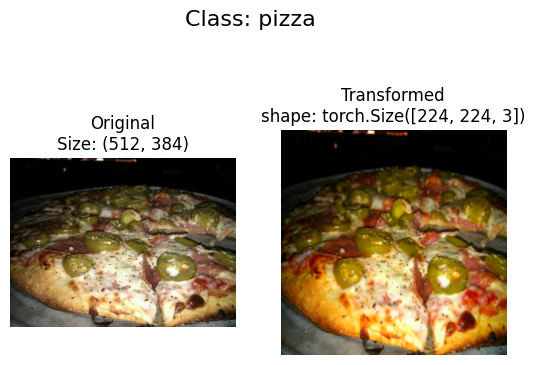

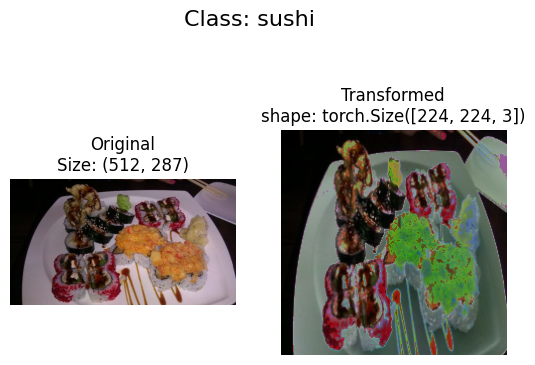

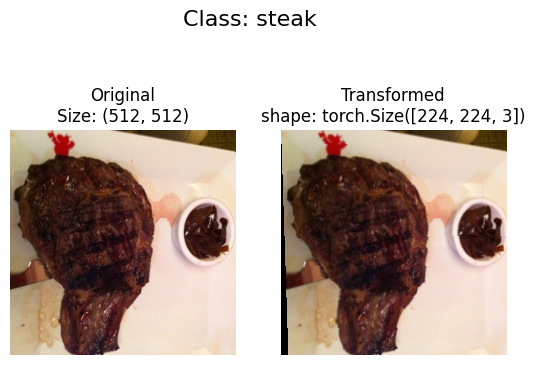

In [ ]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

# 7.Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architecture from the CNN Explainer website

### 7.1 Creating transforms and loading data for Model0

In [ ]:
# Create a simple transfomrs

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

Now we've got a simple transform, let's:
1. Load the data, turning each of our training and test folders first into a `Dataset` with `torchvision.datasets.ImageFolder()`
2. Then into a `DataLoader` using `torch.utils.data.DataLoader()`.
    * We'll set the `batch_size=32` and `num_workers` to as many CPUs on our machine (this will depend on what machine you're using).

In [ ]:
# 1. Load and transform data

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)


# 2. Turn the datasets into DataLoaders
import os
# Setup the batch size and number of workers

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create Dataloaders
train_dataloader_simple = DataLoader(
    dataset= train_data,
    batch_size=BATCH_SIZE,
    num_workers =NUM_WORKERS,
    shuffle=True
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size = BATCH_SIZE,
    shuffle=False,
    num_workers= NUM_WORKERS
)


### 7.2 Create TinyVGG model class


In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explanier:
  """
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
     super().__init__()
     self.conv_block_1 = nn.Sequential(
         nn.Conv2d(in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=0),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding=0),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,
                      stride=2) # Default stride value is same as kernel_size
     )
     self.conv_block_2 = nn.Sequential(
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=0),
         nn.ReLU(),
         nn.Conv2d(in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding=0),
         nn.ReLU(),
         nn.MaxPool2d(kernel_size=2,
                      stride=2) # Default stride value is same as kernel_size
     )
     self.classifier = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features = hidden_units*13*13,
                   out_features=output_shape)
     )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x=self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # Benefits from operation fusion
    return x



> **Note:** One of the ways to speed up deep learning models computing on a GPU is to leverage **operator fusion**.
>
> This means in the `forward()` method in our model above, instead of calling a layer block and reassigning `x` every time, we call each block in succession (see the final line of the `forward()` method in the model above for an example).
>
> This saves the time spent reassigning `x` (memory heavy) and focuses on only computing on `x`.
>
> See [*Making Deep Learning Go Brrrr From First Principles*](https://horace.io/brrr_intro.html) by Horace He for more ways on how to speed up machine learning models.

Now that's a nice looking model!

How about we test it out with a forward pass on a single image?



In [ ]:
# Set the manual seed
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # Number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image(to test the model)

A good way to test a model is to do a forward pass on a single piece of data.

It's also handy way to test the input and output shapes of our different layers.

To do a forward pass on a single image, let's:
1. Get a batch of images and labels from the `DataLoader`.
2. Get a single image from the batch and `unsqueeze()` the image so it has a batch size of `1` (so its shape fits the model).
3. Perform inference on a single image (making sure to send the image to the target `device`).
4. Print out what's happening and convert the model's raw output logits to prediction probabilities with `torch.softmax()` (since we're working with multi-class data) and convert the prediction probabilities to prediction labels with `torch.argmax()`.

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0208, -0.0020,  0.0095]])

Output prediction probabilities:
tensor([[0.3371, 0.3295, 0.3333]])

Output prediction label:
tensor([0])

Actual label:
0


### 7.4 Use `torch.info` to get an idea of the shapes going through our model


Printing out our model with `print(model)` gives us an idea of what's going on with our model.

And we can print out the shapes of our data throughout the `forward()` method.

However, a helpful way to get information from our model is to use [`torchinfo`](https://github.com/TylerYep/torchinfo).

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.

> **Note:** If you're using Google Colab, you'll need to install `torchinfo`.

In [ ]:
# Install torchinfo, import if it's available

try :
  import torchinfo
except:
  ! pip install torchinfo
  import torchinfo

In [ ]:
from torchinfo import summary
summary(model_0, input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

The output of `torchinfo.summary()` gives us a whole bunch of information about our model.

Such as `Total params`, the total number of parameters in our model, the `Estimated Total Size (MB)` which is the size of our model.

You can also see the change in input and output shapes as data of a certain `input_size` moves through our model.

Right now, our parameter numbers and total model size is low.

This because we're starting with a small model.

And if we need to increase its size later, we can.

### 7.5 Create train and test loops function s

Now let's make some training and test loop functions to train our model on the training data and evaluate our model on the testing data.

And to make sure we can use these the training and testing loops again, we'll functionize them.

Specifically, we're going to make three functions:
1. `train_step()` - takes in a model, a `DataLoader`, a loss function and an optimizer and trains the model on the `DataLoader`.
2. `test_step()` - takes in a model, a `DataLoader` and a loss function and evaluates the model on the `DataLoader`.
3. `train()` - performs 1. and 2. together for a given number of epochs and returns a results dictionary.

Let's start by building `train_step()`.

Because we're dealing with batches in the `DataLoader`'s, we'll accumulate the model loss and accuracy values during training (by adding them up for each batch) and then adjust them at the end before we return them.

In [ ]:
# Create trian_step()
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):

  # Put the model in trian mode
  model.train()


  # Setup train loss and train accuracy vales
  train_loss,train_acc=0,0

  # Loop through data loader data batches
  for batch , (X,y) in enumerate(dataloader):
    # Send data to the target device
    X,y = X.to(device),y.to(device)


    # 1. Forward pass
    y_pred = model_0(X)# output model logits

    # 2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss+=loss.item()

    # 3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    # Calculate the accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+= (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)
  return train_loss,train_acc

Now let's do the same for the `test_step()` function.

The main difference here will be the `test_step()` won't take in an optimizer and therefore won't perform gradient descent.

But since we'll be doing inference, we'll make sure to turn on the `torch.inference_mode()` context manager for making predictions.

In [ ]:
# Create a test step
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):

  # Put model on eval mode
  model.eval()

  # Set up test loss and test accuracy values
  test_loss, test_acc = 0,0

  # Turn on inference mode

  with torch.inference_mode():
    # Loop through DataLoader batchs
    for batch, (X,y) in enumerate(dataloader):

      # Send data to the target device
      X, y = X.to(device),y.to(device)

      #1. Forward pass
      test_pred_logits = model(X)

      #2. Calculate the loss
      loss= loss_fn(test_pred_logits,y)
      test_loss+=loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc+=((test_pred_labels==y).sum().item()/len(test_pred_labels))

  # Adjust metrics to average loss and accyracy per batch
  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)
  return test_loss,test_acc




### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

Now we need a way to put our `train_step()` and `test_step()` functions together.

To do so, we'll package them up in a `train()` function.

This function will train the model as well as evaluate it.

Specificially, it'll:
1. Take in a model, a `DataLoader` for training and test sets, an optimizer, a loss function and how many epochs to perform each train and test step for.
2. Create an empty results dictionary for `train_loss`, `train_acc`, `test_loss` and `test_acc` values (we can fill this up as training goes on).
3. Loop through the training and test step functions for a number of epochs.
4. Print out what's happening at the end of each epoch.
5. Update the empty results dictionary with the updated metrics each epoch.
6. Return the filled

To keep track of the number of epochs we've been through, let's import `tqdm` from `tqdm.auto` ([`tqdm`](https://github.com/tqdm/tqdm) is one of the most popular progress bar libraries for Python and `tqdm.auto` automatically decides what kind of progress bar is best for your computing environment, e.g. Jupyter Notebook vs. Python script).

In [ ]:
from tqdm.auto import tqdm


# 1. Create a train function that takes in various model parameters, optimizers, dataloader and loss function

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn: torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model= model,
                                      dataloader = train_dataloader,
                                      loss_fn = loss_fn,
                                      optimizer = optimizer,
                                      device = device)

    test_loss,test_acc = test_step(model=model,
                                   dataloader=test_dataloader,
                                   loss_fn = loss_fn,
                                   device = device)

    # 4. Print what's happening
    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Test loss {test_loss:.4f} | Test acc :{test_acc:.4f}')

    # 5. Update results dictionary to keep track of the results
    results['train_loss'].append(train_loss)
    results['train_acc'].append(train_acc)
    results['test_loss'].append(test_loss)
    results['test_acc'].append(test_acc)

  # 6. Return the results
  return results


### 7.7 Train and evaluate `model_0`

Time to put our `TinyVGG` model, `DataLoader`'s and `train()` function together to see if we can build a model capable of discerning between pizza, steak and sushi!

Let's recreate `model_0` (we don't need to but we will for completeness) then call our `train()` function passing in the necessary parameters.

To keep our experiments quick, we'll train our model for **5 epochs** (though you could increase this if you want).

As for an **optimizer** and **loss function**, we'll use `torch.nn.CrossEntropyLoss()` (since we're working with multi-class classification data) and `torch.optim.Adam()` with a learning rate of `1e-3` respecitvely.

To see how long things take, we'll import Python's [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) method to calculate the training time.

In [ ]:
# Set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader= test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS)


# End the timer and print out how long it took
end_time = timer()
print(f'Total training time : {end_time - start_time:.3f} seconds')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1040 | Train Acc: 0.2695 | Test loss 1.1016 | Test acc :0.2604
Epoch: 1 | Train loss: 1.1003 | Train Acc: 0.3047 | Test loss 1.0996 | Test acc :0.2708
Epoch: 2 | Train loss: 1.0951 | Train Acc: 0.4531 | Test loss 1.0868 | Test acc :0.2604
Epoch: 3 | Train loss: 1.1155 | Train Acc: 0.3047 | Test loss 1.0997 | Test acc :0.2604
Epoch: 4 | Train loss: 1.0795 | Train Acc: 0.4531 | Test loss 1.1277 | Test acc :0.1979
Epoch: 5 | Train loss: 1.0640 | Train Acc: 0.4141 | Test loss 1.1569 | Test acc :0.1979
Epoch: 6 | Train loss: 1.0803 | Train Acc: 0.2969 | Test loss 1.1447 | Test acc :0.3021
Epoch: 7 | Train loss: 1.0289 | Train Acc: 0.5664 | Test loss 1.0821 | Test acc :0.3428
Epoch: 8 | Train loss: 0.9646 | Train Acc: 0.5742 | Test loss 1.0993 | Test acc :0.3532
Epoch: 9 | Train loss: 1.0445 | Train Acc: 0.4688 | Test loss 0.9701 | Test acc :0.5540
Epoch: 10 | Train loss: 0.9304 | Train Acc: 0.5469 | Test loss 0.9239 | Test acc :0.5530
Epoch: 11 | Train loss: 0.8991 

It looks like our model performed pretty poorly.

But that's okay for now, we'll keep persevering.

What are some ways you could potentially improve it?

> **Note:** Check out the [*Improving a model (from a model perspective)* section in notebook 02](https://www.learnpytorch.io/02_pytorch_classification/#5-improving-a-model-from-a-model-perspective) for ideas on improving our TinyVGG model.

Let us check the results of `model_0`


In [ ]:
model_0_results

{'train_loss': [1.1039927899837494,
  1.100318431854248,
  1.0950658023357391,
  1.1154673844575882,
  1.079459473490715,
  1.0640110597014427,
  1.0802590399980545,
  1.0288961976766586,
  0.9645846113562584,
  1.0445282012224197,
  0.930386371910572,
  0.8990563601255417,
  0.8177883699536324,
  0.8586215376853943,
  1.203324779868126,
  0.8298280537128448,
  0.8295216485857964,
  0.8684394732117653,
  0.7712076157331467,
  0.6558062658878043],
 'train_acc': [0.26953125,
  0.3046875,
  0.453125,
  0.3046875,
  0.453125,
  0.4140625,
  0.296875,
  0.56640625,
  0.57421875,
  0.46875,
  0.546875,
  0.55078125,
  0.62109375,
  0.5546875,
  0.5,
  0.71484375,
  0.640625,
  0.5703125,
  0.671875,
  0.71484375],
 'test_loss': [1.1015715599060059,
  1.0996286471684773,
  1.0868282318115234,
  1.0996737480163574,
  1.127695361773173,
  1.1569461822509766,
  1.1447166800498962,
  1.0821173389752705,
  1.099299132823944,
  0.9701433380444845,
  0.9238696297009786,
  0.9601368109385172,
  0.978

###7.8 Plot the models of `model_0`
From the print outs of our `model_0` training, it didn't look like it did too well.

But we can further evaluate it by plotting the model's **loss curves**.

**Loss curves** show the model's results over time.

And they're a great way to see how your model performs on different datasets (e.g. training and test).

Let's create a function to plot the values in our `model_0_results` dictionary.

In [ ]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results:Dict[str,List[float]]):
  """
  Plots training curves of a results dictionary
  """

  # Get the loss values of the resutls dictionary(training and test)
  loss = results['train_loss']
  test_loss = results['test_loss']

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results['train_acc']
  test_accuracy = results['test_acc']

  # Figure out how many epochs there were
  epochs = range(len(results['train_loss']))

  # Setup a plot
  plt.figure(figsize=(15,7))

  # Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='Train loss')
  plt.plot(epochs,test_loss,label='Test loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy, label='Train Accuracy')
  plt.plot(epochs,test_accuracy,label='Test Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

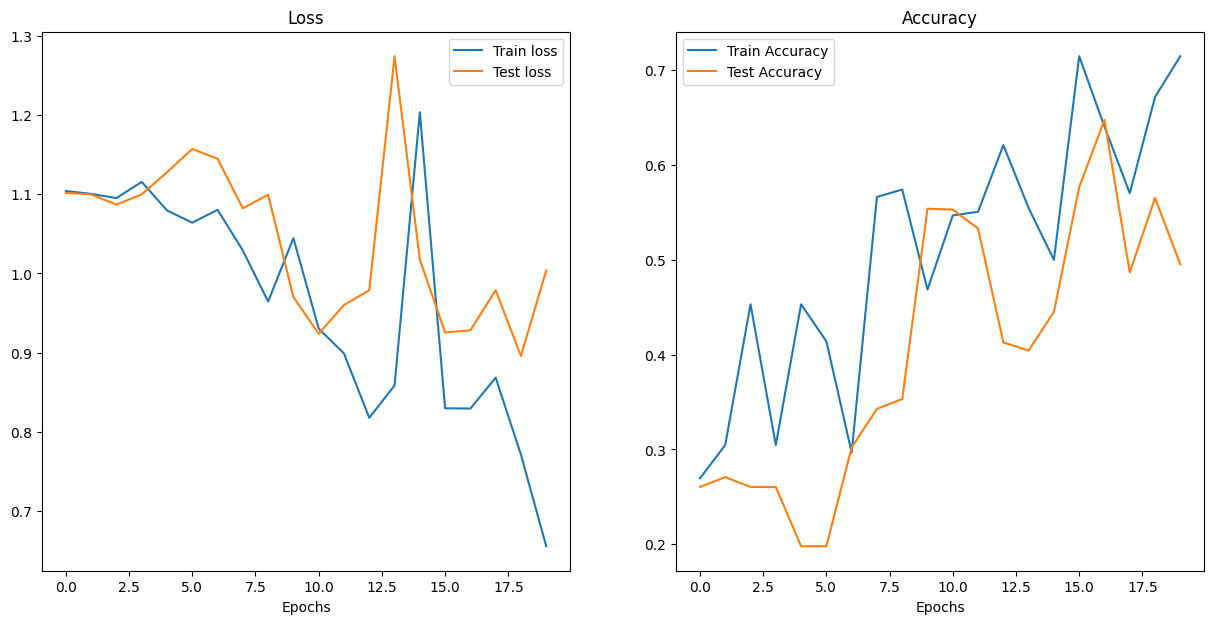

In [ ]:
plot_loss_curves(model_0_results)

Looks like things are all over the place...

But we kind of knew that because our model's print out results during training didn't show much promise.

You could try training the model for longer and see what happens when you plot a loss curve over a longer time horizon.

##8. What should an Ideal Loss Curve look like?

Looking at training and test loss curves is a great way to see if your model is **overfitting**.

An overfitting model is one that performs better (often by a considerable margin) on the training set than the validation/test set.

If your training loss is far lower than your test loss, your model is **overfitting**.

As in, it's learning the patterns in the training too well and those patterns aren't generalizing to the test data.

The other side is when your training and test loss are not as low as you'd like, this is considered **underfitting**.

The ideal position for a training and test loss curve is for them to line up closely with each other.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="different training and test loss curves illustrating overfitting, underfitting and the ideal loss curves" width="800"/>

*Left: If your training and test loss curves aren't as low as you'd like, this is considered **underfitting**. *Middle:* When your test/validation loss is higher than your training loss this is considered **overfitting**. *Right:* The ideal scenario is when your training and test loss curves line up over time. This means your model is generalizing well. There are more combinations and different things loss curves can do, for more on these, see Google's [Interpreting Loss Curves guide](https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic).*

### 8.1 How to deal with overfitting

Since the main problem with overfitting is that you're model is fitting the training data *too well*, you'll want to use techniques to "reign it in".

A common technique of preventing overfitting is known as [**regularization**](https://ml-cheatsheet.readthedocs.io/en/latest/regularization.html).

I like to think of this as "making our models more regular", as in, capable of fitting *more* kinds of data.

Let's discuss a few methods to prevent overfitting.

| **Method to prevent overfitting** | **What is it?** |
| ----- | ----- |
| **Get more data** | Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples. |
| **Simplify your model** | If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer. |
| **Use data augmentation** | [**Data augmentation**](https://developers.google.com/machine-learning/glossary#data-augmentation) manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data. |
| **Use transfer learning** | [**Transfer learning**](https://developers.google.com/machine-learning/glossary#transfer-learning) involves leveraging the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images. |
| **Use dropout layers** | Dropout layers randomly remove connections between hidden layers in neural networks, effectively simplifying a model but also making the remaining connections better. See [`torch.nn.Dropout()`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) for more. |
| **Use learning rate decay** | The idea here is to slowly decrease the learning rate as a model trains. This is akin to reaching for a coin at the back of a couch. The closer you get, the smaller your steps. The same with the learning rate, the closer you get to [**convergence**](https://developers.google.com/machine-learning/glossary#convergence), the smaller you'll want your weight updates to be.  |
| **Use early stopping** | [**Early stopping**](https://developers.google.com/machine-learning/glossary#early_stopping) stops model training *before* it begins to overfit. As in, say the model's loss has stopped decreasing for the past 10 epochs (this number is arbitrary), you may want to stop the model training here and go with the model weights that had the lowest loss (10 epochs prior). |

There are more methods for dealing with overfitting but these are some of the main ones.

As you start to build more and more deep models, you'll find because deep learnings are *so good* at learning patterns in data, dealing with overfitting is one of the primary problems of deep learning.

### 8.2 How to deal with underfitting

When a model is [**underfitting**](https://developers.google.com/machine-learning/glossary#underfitting) it is considered to have poor predictive power on the training and test sets.

In essence, an underfitting model will fail to reduce the loss values to a desired level.

Right now, looking at our current loss curves, I'd considered our `TinyVGG` model, `model_0`, to be underfitting the data.

The main idea behind dealing with underfitting is to *increase* your model's predictive power.

There are several ways to do this.

| **Method to prevent underfitting** | **What is it?** |
| ----- | ----- |
| **Add more layers/units to your model** | If your model is underfitting, it may not have enough capability to *learn* the required patterns/weights/representations of the data to be predictive. One way to add more predictive power to your model is to increase the number of hidden layers/units within those layers. |
| **Tweak the learning rate** | Perhaps your model's learning rate is too high to begin with. And it's trying to update its weights each epoch too much, in turn not learning anything. In this case, you might lower the learning rate and see what happens. |
| **Use transfer learning** | Transfer learning is capable of preventing overfitting and underfitting. It involves using the patterns from a previously working model and adjusting them to your own problem. |
| **Train for longer** | Sometimes a model just needs more time to learn representations of data. If you find in your smaller experiments your model isn't learning anything, perhaps leaving it train for a more epochs may result in better performance. |
| **Use less regularization** | Perhaps your model is underfitting because you're trying to prevent overfitting too much. Holding back on regularization techniques can help your model fit the data better. |

### 8.3 The balance between overfitting and underfitting

None of the methods discussed above are silver bullets, meaning, they don't always work.

And preventing overfitting and underfitting is possibly the most active area of machine learning research.

Since everone wants their models to fit better (less underfitting) but not so good they don't generalize well and perform in the real world (less overfitting).

There's a fine line between overfitting and underfitting.

Because too much of each can cause the other.

Transfer learning is perhaps one of the most powerful techniques when it comes to dealing with both overfitting and underfitting on your own problems.

Rather than handcraft different overfitting and underfitting techniques, transfer learning enables you to take an already working model in a similar problem space to yours (say one from [paperswithcode.com/sota](https://paperswithcode.com/sota) or [Hugging Face models](https://huggingface.co/models)) and apply it to your own dataset.

We'll see the power of transfer learning in a later notebook.

##9. Create a TinyVGG model with data augmentation

Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

Now let's try another modelling experiment this time with data augmentaion

###9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment

from torchvision import transforms
train_transforms_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins=5),
                                               transforms.ToTensor()
                                               ])

test_transforms_trivial=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

Now let's turn our images into `Dataset`'s using `torchvision.datasets.ImageFolder()` and then into `DataLoader`'s with `torch.utils.data.DataLoader()`.

### 9.2 Create train and test `Dataset`'s and `DataLoader`'s

We'll make sure the train `Dataset` uses the `train_transform_trivial_augment` and the test `Dataset` uses the `test_transform`.

In [ ]:
# Turn images folders into Datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transforms_trivial
                                            )
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transforms_trivial)

train_data_augmented,test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=5, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

And we'll make `DataLoader`'s with a `batch_size=32` and with `num_workers` set to the number of CPUs available on our machine (we can get this using Python's `os.cpu_count()`).

In [ ]:
# Turn Datasets into dataloaders
import os
NUM_WORKERS = os.cpu_count()
BATCH_SIZE=32

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

###9.3 Construct and Train `model_1`

This time we'll be using the same model architecture but the data we are training with is augmented

Now to build our next model, `model_1`, we can reuse our `TinyVGG` class from before.

We'll make sure to send it to the target device.

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape = len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=3, bias=True)
  )
)


Since we've already got functions for the training loop (`train_step()`) and testing loop (`test_step()`) and a function to put them together in `train()`, let's reuse those.

We'll use the same setup as `model_0` with only the `train_dataloader` parameter varying:
* Train for 5 epochs.
* Use `train_dataloader=train_dataloader_augmented` as the training data in `train()`.
* Use `torch.nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification).
* Use `torch.optim.Adam()` with `lr=0.001` as the learning rate as the optimizer.                                                         

In [ ]:
# Set random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS =20

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        loss_fn = loss_fn,
                        optimizer=optimizer,
                        epochs = NUM_EPOCHS)

# End the timer and print out how long it took
end_time=timer()

print(f'Total training time for model 1 {end_time-start_time:.3f} seconds')

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1194 | Train Acc: 0.5273 | Test loss 1.1045 | Test acc :0.1979
Epoch: 1 | Train loss: 1.9269 | Train Acc: 0.5195 | Test loss 1.1045 | Test acc :0.1979
Epoch: 2 | Train loss: 0.9794 | Train Acc: 0.6055 | Test loss 1.1045 | Test acc :0.1979
Epoch: 3 | Train loss: 1.1273 | Train Acc: 0.5273 | Test loss 1.1045 | Test acc :0.1979
Epoch: 4 | Train loss: 1.7844 | Train Acc: 0.5312 | Test loss 1.1045 | Test acc :0.1979
Epoch: 5 | Train loss: 1.1694 | Train Acc: 0.5078 | Test loss 1.1045 | Test acc :0.1979
Epoch: 6 | Train loss: 1.0514 | Train Acc: 0.6406 | Test loss 1.1045 | Test acc :0.1979
Epoch: 7 | Train loss: 0.9535 | Train Acc: 0.6641 | Test loss 1.1045 | Test acc :0.1979
Epoch: 8 | Train loss: 0.9891 | Train Acc: 0.5273 | Test loss 1.1045 | Test acc :0.1979
Epoch: 9 | Train loss: 1.1774 | Train Acc: 0.6328 | Test loss 1.1045 | Test acc :0.1979
Epoch: 10 | Train loss: 1.6700 | Train Acc: 0.5078 | Test loss 1.1045 | Test acc :0.1979
Epoch: 11 | Train loss: 0.9188 

###9.4 Get the plot loss curves for `model_1`

Since we've got the results of `model_1` saved in a results dictionary, `model_1_results`, we can plot them using `plot_loss_curves()`.

In [ ]:
model_1_results

{'train_loss': [1.119430385529995,
  1.9268638417124748,
  0.9793767873197794,
  1.1272816434502602,
  1.7844382226467133,
  1.1694106683135033,
  1.0514363977126777,
  0.9534676298499107,
  0.9891004487872124,
  1.177386723458767,
  1.669991910457611,
  0.9187520099803805,
  1.3641889095306396,
  1.8321307599544525,
  1.1481042131781578,
  1.3639108575880527,
  1.1724923998117447,
  0.9919733293354511,
  1.1465759202837944,
  0.9576328918337822],
 'train_acc': [0.52734375,
  0.51953125,
  0.60546875,
  0.52734375,
  0.53125,
  0.5078125,
  0.640625,
  0.6640625,
  0.52734375,
  0.6328125,
  0.5078125,
  0.625,
  0.4921875,
  0.515625,
  0.5078125,
  0.5859375,
  0.4765625,
  0.640625,
  0.63671875,
  0.5625],
 'test_loss': [1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.104461908340454,
  1.10446190834

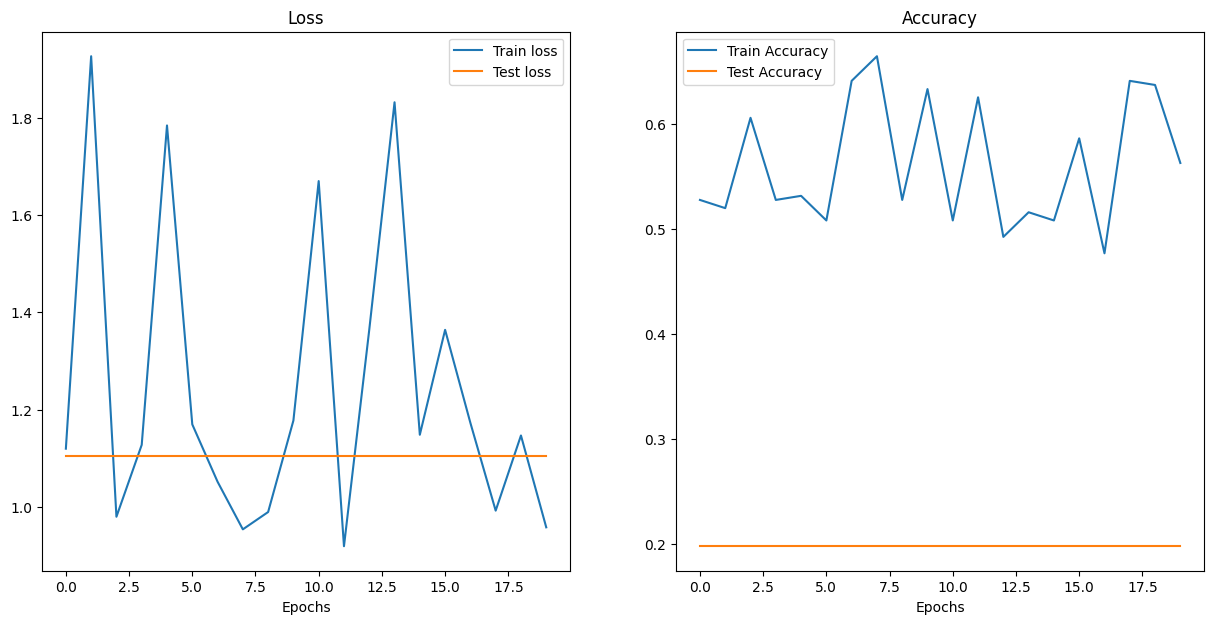

In [ ]:
plot_loss_curves(model_1_results)

##10. Compare model results

After evaluating our modelling experiments on their own, it's important to compare them to each other

There are a few different ways to do this:
1. Hard coding
2. PyTorch + Tensorboard - [Documentation](https://pytorch.org/docs/stable/tensorboard.html)
3. Weights & Biases
4. MLFlow

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.103993,0.269531,1.101572,0.260417
1,1.100318,0.304688,1.099629,0.270833
2,1.095066,0.453125,1.086828,0.260417
3,1.115467,0.304688,1.099674,0.260417
4,1.079459,0.453125,1.127695,0.197917
5,1.064011,0.414062,1.156946,0.197917
6,1.080259,0.296875,1.144717,0.302083
7,1.028896,0.566406,1.082117,0.342803
8,0.964585,0.574219,1.099299,0.353220
9,1.044528,0.468750,0.970143,0.553977


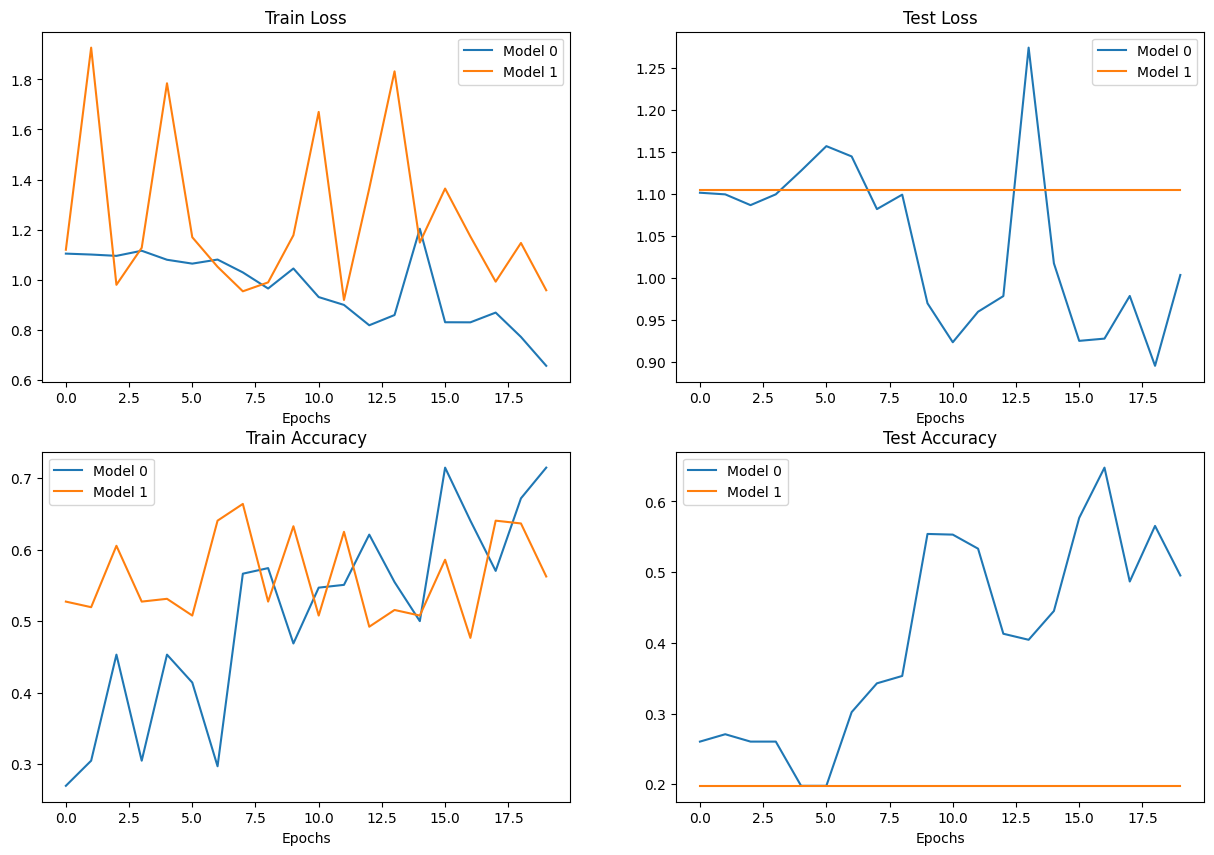

In [ ]:
# Setup a plot
plt.figure(figsize=(15,10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'],label= "Model 0")
plt.plot(epochs,model_1_df['train_loss'], label='Model 1')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'],label= "Model 0")
plt.plot(epochs,model_1_df['test_loss'], label='Model 1')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot train loss
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'],label= "Model 0")
plt.plot(epochs,model_1_df['train_acc'], label='Model 1')
plt.title('Train Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Plot test loss
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'],label= "Model 0")
plt.plot(epochs,model_1_df['test_acc'], label='Model 1')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.legend();




##11. Making a prediction on a custom image


If you've trained a model on a certain dataset, chances are you'd like to make a prediction on on your own custom data.

In our case, since we've trained a model on pizza, steak and sushi images, how could we use our model to make a prediction on one of our own images?

To do so, we can load an image and then **preprocess it in a way that matches the type of data our model was trained on**.

In other words, we'll have to convert our own custom image to a tensor and make sure it's in the right datatype before passing it to our model.

Let's start by downloading a custom image.

Since our model predicts whether an image contains pizza, steak or sushi, let's download a photo of [my Dad giving two thumbs up to a big pizza from the Learn PyTorch for Deep Learning GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg).

We download the image using Python's `requests` module.

> **Note:** If you're using Google Colab, you can also upload an image to the current session by going to the left hand side menu -> Files -> Upload to session storage. Beware though, this image will delete when your Google Colab session ends.



In [ ]:
# Download custom image

import requests

# Setup custom image path
custom_image_path = data_path/"04-pizza-dad.jpeg"

# Download the image id it desn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path,'wb') as f:
    # When downloading from GitHub, need to use the raw file link
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg')
    print(f'Downloading {custom_image_path}...')
    f.write(request.content)
else:
  print(f'{custom_image_path} already exists, skipping download...')

###11.1 Loading in a custom image with PyTorch

We have to make sure that our custom images is in the same format as the data our model was trained on .

* In tensor form with datatype(torch.float32)
* Of shape 64x64x3
* On the right device

We can read an image into PyTorch using `torchvision.io.read_image()`

In [ ]:
import torchvision

# Read custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f'Custom image tensor\n {custom_image_uint8}')
print(f'Custom image shape: {custom_image_uint8.shape}')
print(f'Custom image datatype: {custom_image_uint8.dtype}')

Custom image tensor
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 4032, 3024])
Custom image datat

Let us plot the image using `plt.imshow()`

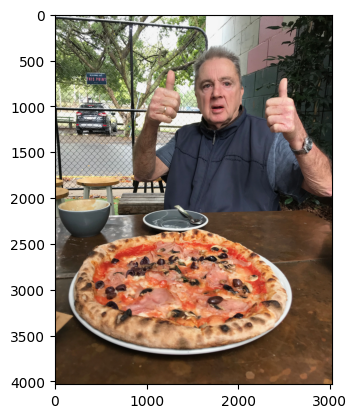

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0));

### 11.2 Making a prediction on a custom image with a trained PyTorch model

In [ ]:
# Try to make a prediction on an image in uint8 format

model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
# Load the image and convert them into torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (20x756765 and 3380x3)

Despite our preparations our custom image and model are on different devices.

And we get the error:

> `RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper___slow_conv2d_forward)`

Let's fix that by putting our `custom_image_transformed` on the target device.

In [ ]:
# Create a transform pipeline to resize the image
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shape
print(f'Original shape: {custom_image.shape}')
print(f'Tranformed Shape: {custom_image_transformed.shape}')

Original shape: torch.Size([3, 4032, 3024])
Tranformed Shape: torch.Size([3, 64, 64])


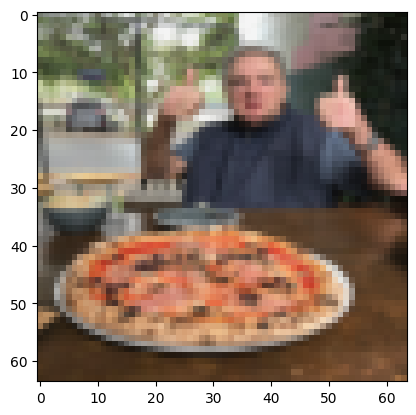

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0));

In [ ]:
# THis will error Batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred= model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (20x169 and 3380x3)

In [ ]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shape

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred= model_1(custom_image_transformed.unsqueeze(0).to(device))

Yes!!!

It looks like it worked!

> **Note:** What we've just gone through are three of the classical and most common deep learning and PyTorch issues:
> 1. **Wrong datatypes** - our model expects `torch.float32` where our original custom image was `uint8`.
> 2. **Wrong device** - our model was on the target `device` (in our case, the GPU) whereas our target data hadn't been moved to the target `device` yet.
> 3. **Wrong shapes** - our model expected an input image of shape `[N, C, H, W]` or `[batch_size, color_channels, height, width]` whereas our custom image tensor was of shape `[color_channels, height, width]`.
>
> Keep in mind, these errors aren't just for predicting on custom images.
>
> They will be present with almost every kind of data type (text, audio, structured data) and problem you work with.

Now let's take a look at our model's predictions.

In [ ]:
custom_image_pred

tensor([[-0.0220,  0.0238, -0.0189]])

In [ ]:
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3279, 0.3432, 0.3289]])

In [ ]:
# Convert the prediction probabilities -> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs,dim=1)
custom_image_pred_labels

tensor([1])

In [ ]:
class_names[custom_image_pred_labels]

'steak'

### 11.3 Putting custom imagea prediction together: building a function

Doing all of the above steps every time you'd like to make a prediction on a custom image would quickly become tedious.

So let's put them all together in a function we can easily use over and over again.

Specifically, let's make a function that:
1. Takes in a target image path and converts to the right datatype for our model (`torch.float32`).
2. Makes sure the target image pixel values are in the range `[0, 1]`.
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.



In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

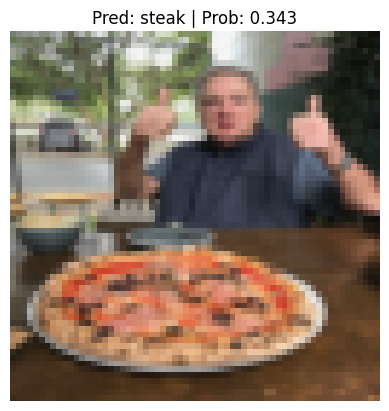

In [ ]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)